I recently saw Michael Galloy's post at http://michaelgalloy.com/2016/02/18/ten-little-idl-programs.html, showing some short (less than ten lines long) programs in IDL. I used to do a lot of programming in IDL, but have switched almost all of my work to Python now - and was intrigued to see what the code looked like in Python.

I can't guarantee that all of my Python code here will give _exactly_ the same answer as the IDL code - but the code should accomplish the same aim. I've included the IDL code that Michael provided, and for each example I provide a few comments about the differences between the Python and IDL code. I haven't shown the output of the IDL examples in the notebook (yes, I know I can run IDL through the Jupyter Notebook, but I don't have that set up on this machine.

Firstly, we import the various modules that we need for Python. This is rather different to IDL, where all of the functionality for these programs is built in - but is not necessarily a disadvantage, as it allows an easier separation of functionality, allowing you to only include the functions you need. I'm going to 'cheat' slightly, and not count these `import` lines in the number of lines of code used below - which I think is fair.

In [1]:
%matplotlib inline
import os
import numpy as np
import pandas as pd
from matplotlib.pyplot import *
from PIL import Image
from skimage.filters import sobel
from skimage.feature import canny

It is also worth noting that counting the number of lines of a bit of Python code is rather arbitrary - because although whitespace is syntactically important, you can still often combine multiple lines into one line. For example:

In [2]:
a = 5; b = 10; print(a+b)

15


Here I'm going to keep to writing Python in a sensible, relatively standard (hopefully PEP8 compliant) way.

## 1 line: output, calling a procedure:

#### IDL

In [ ]:
print, 'Hello, world!'

#### Python

In [3]:
print("Hello, world!")

Hello, world!


These are almost exactly the same...not much to see here!

## 2 lines: assignment, calling a function, system variables, array operations, keywords:

#### IDL

In [ ]:
x = findgen(360) * !dtor
plot, x, sin(x), xstyle=9, ystyle=8

#### Python

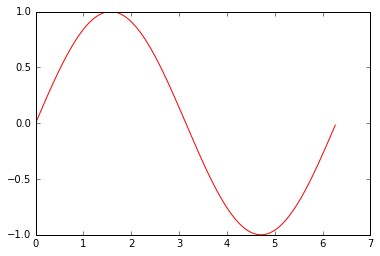

In [4]:
x = np.radians(np.arange(360))
plot(x, np.sin(x), 'r-')

This is fairly similar, the major differences being the use of the `np.` prefix on various functions as they are part of the `numpy` library (this can be avoided by importing numpy as `from numpy import *`, but that is not recommended). The only other real differences are the use of a function to convert from degrees to radians, rather than a constant conversion factor, and the differences in the name of the function that produces an array containing a range of values - I personally found `findgen` always made me thinking of FINDing something, rather than Floating INDex GENeration, but that's just me!

## 3 lines: input, output format codes:

#### IDL

In [ ]:
name = ''
read, 'What is your name? ', name
print, name, format='("Hello, ", A, "!")'

#### Python

In [5]:
name = input('What is your name? ')
print("Hello {name}!".format(name=name))

What is your name? Robin
Hello Robin!


This is the first example where the lengths differ - and Python is very slightly shorter. The only reason for this is that IDL requires you to initialise the `name` variable before you can read into it, whereas Python does not. I prefer the way that the formatting of the string works in Python - although this is but one of multiple ways of doing it in Python. For reference, you could also do any of the following:

In [ ]:
print("Hello %s!" % (name))
print("Hello " + name + "!")

## 5 lines: filename handling, reading images, variable metadata, boolean keywords, displaying image:

#### IDL

In [ ]:
filename = filepath('people.jpg', subdir=['examples', 'data'])
im = read_image(filename)
dim = size(im, /dimensions)
window, xsize=dim[1], ysize=dim[2], /free, title=file_basename(filename)
tv, im, true=1

#### Python

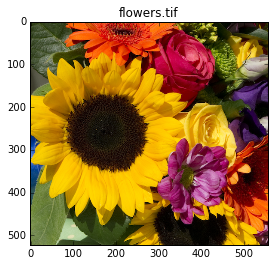

In [7]:
filename = os.path.join('examples', 'data', 'flowers.tif')
im = Image.open(filename)
imshow(im)
title(os.path.basename(filename))

This example is also slightly shorter in Python, mainly because we don't have to create the display window manually, and therefore we don't need to find out the size of the image before-hand. On the other hand, Python has no way to set the title of a plot in the call to the plotting function (in this case `imshow`, which I personally think is a more understandable name than `tv`), which adds an extra line.

## 6 lines: logical unit numbers, read binary data, contour plots, line continuation:

#### IDL

In [ ]:
convec = bytarr(248, 248)
openr, lun, file_which('convec.dat'), /get_lun
readu, lun, convec
free_lun, lun
window, xsize=500, ysize=500, /free
contour, convec, xstyle=1, ystyle=1, $
         levels=(max(convec) - min(convec)) * findgen(10) / 9. + min(convec)

#### Python

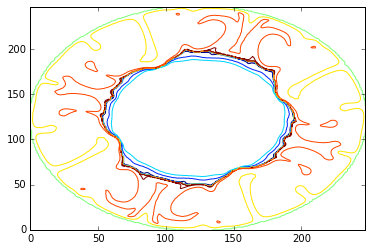

In [9]:
convec = np.fromfile('convec.dat',
                     dtype=np.byte)
convec = convec.reshape((248, 248))
contour(convec)

This is also shorter, although I must admit that I haven't configured the contour levels manually as was done in the IDL code - as I often find I don't need to that. Again, you can see that we don't need to create the array before we read in the file, and we don't have to deal with all of the opening, reading and closing of the file as the `np.fromfile` function does all of that for us. (If we did want to work at a lower level then we could - using functions like `open` and `close`). I've also shown a line continuation in Python, which in many circumstances works with no explicit 'continuation characters' - even though it wasn't really needed in this situation.

## 7 lines (contributed by Mark Piper): query image, image processing, automatic positioning of images:

#### IDL

In [ ]:
file = file_which('moon_landing.png')
!null = query_image(file, info)
astronaut = read_image(file)
window, /free, xsize=3 * info.dimensions[0], ysize=info.dimensions[1]
tv, astronaut, 0
tvscl, sobel(astronaut), 1
tvscl, canny(astronaut), 2

#### Python

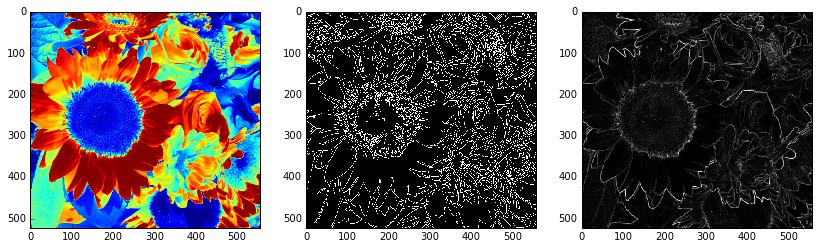

In [10]:
im = Image.open('examples/data/flowers.tif')
im = np.array(im)[:, :, 0]
figure(figsize=(14, 10))
subplot(131)
imshow(im)
subplot(132)
imshow(canny(im), interpolation='nearest', cmap=cm.gray)
subplot(133)
imshow(sobel(im), interpolation='nearest', cmap=cm.gray)

Here the Python version is longer than the IDL version - although the majority of this length comes from the `subplot` commands which are used to combine multiple plots into one window (or one output image). Apart from that, the majority of the code is very similar - albeit with some extra parameters for the python `imshow` command to force nearest-neighbour interpolation and a gray-scale colormap (though these can easily be configured to be the defaults).

## 8 lines: writing a function, compile_opt statement, if statements, for loops:

#### IDL

In [ ]:
.compile
function mg_fibonacci, x
  compile_opt strictarr
  if (x eq 0) then return, 0
  if (x eq 1) then return, 1
  return, mg_fibonacci(x - 1) + mg_fibonacci(x - 2)
end
for i = 0L, 20L do print, i, mg_fibonacci(i)

#### Python

In [12]:
def mg_fibonacci(x):
    if x == 0:
        return 0
    if x == 1:
        return x
    else:
        return mg_fibonacci(x - 1) + mg_fibonacci(x - 2)

for i in range(10):  # Only 10 lines of output to keep the blog post reasonably short!
    print(i, mg_fibonacci(i))

0 0
1 1
2 1
3 2
4 3
5 5
6 8
7 13
8 21
9 34


The code here is almost the same length (9 lines for Python and 8 for IDL), even though the Python code looks a lot more 'spacious'. This is mainly because we don't need the `.compile` or `compile_opt` lines in Python. Apart from that, the code is very similar with the main differences being Python's use of syntactic whitespace and use of 'proper' equals signs rather than IDL's `eq` (and `gt`, `lt` etc).

## 9 lines (contributed by Mark Piper): array generation, FFTs, line plots, multiple plots/window, query for screen size:

#### IDL

In [ ]:
x = (2.0 * !pi) * findgen(100) / 100
y = sin(3.0 * x) + cos(12.0 * x) + cos(25.2 * x)
magspec_y = abs(fft(y))
ss = get_screen_size()
window, /free, xsize=0.4 * ss[0], ysize=0.25 * ss[1]
!p.multi = [0,2,1]
plot, x, y, xtitle='sample number', ytitle='value', title='Series', xstyle=1
plot, magspec_y, xtitle='mode', ytitle='spectral density', $
      title='Magnitude Spectrum', xrange=[0, n_elements(x) / 2], xstyle=1
!p.multi = 0

#### Python

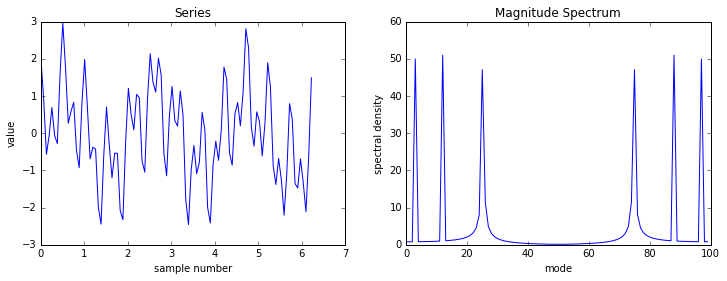

In [13]:
x = (2.0 * np.pi) * np.arange(100) / 100.0
y = np.sin(3.0 * x) + np.cos(12.0 * x) + np.cos(25.2 * x)

magspec_y = abs(np.fft.fft(y))

figure(figsize=(12, 4))
subplot(121)
plot(x, y)
xlabel('sample number')
ylabel('value')
title('Series')
subplot(122)
plot(magspec_y)
xlabel('mode')
ylabel('spectral density')
title('Magnitude Spectrum')

The Python code is a lot longer here, but that is mainly due to Python requiring a separate function call to set each piece of text on a plot (the title, x-axis label, y-axis label etc). Apart from that there aren't many differences beyond those already discussed above.

## 10 lines: maps, read ASCII file, indexed color, structures:

#### IDL

In [ ]:
header = strarr(5)
data = replicate({loc:fltarr(2), elev:0, temp:0, dew:0, wspd:0, wdir:0}, 15)
openr, lun, file_which('ascii.txt'), /get_lun
readf, lun, header
readf, lun, data
free_lun, lun
device, decomposed=0
loadct, 5
map_set, limit=[min(data.loc[1, *], max=maxlat), $
         min(data.loc[0, *], max=maxlon), maxlat, maxlon], /mercator, /usa
plots, data.loc[0, *], data.loc[1, *], psym=4, color=bytscl(data.temp), $
       symsize=2., thick=2

#### Python

I'm going to go through the Python code in a few bits for this one...

Firstly, reading CSVs in Python is _really_ easy using the `pandas` library. The first six lines of IDL code can be replaced with this single function call:

In [15]:
df = pd.read_csv('/Users/robin/ascii.txt', skiprows=5,
                 names=['lon', 'lat', 'elev', 'temp', 'dew', 'wspd', 'wdir'])

And you can print out the DataFrame and check that the CSV has loaded properly:

In [16]:
df

lon      lat  elev  temp  dew  wspd  wdir
0  -156.9500  20.7833   399    68   64    10    60
1  -116.9667  33.9333   692    77   50     8   270
2  -104.2545  32.3340  1003    87   50    10   340
3  -114.5225  37.6073  1333    66   35     0     0
4  -106.9418  47.3222   811    68   57     8   140
5   -94.7500  31.2335    90    89   73    10   250
6   -73.6063  43.3362   100    75   64     3   180
7  -117.1765  32.7335     4    64   62     5   200
8  -116.0930  44.8833  1530    55   51     0     0
9  -106.3722  31.8067  1206    82   57     9    10
10  -93.2237  30.1215     4    87   77     7   260
11 -109.6347  32.8543   968    80   46     0     0
12  -76.0225  43.9867    99    75   66     7   190
13  -93.1535  36.2597   415    86   71    10   310
14 -118.7213  34.7395  1378    71   46     5   200

Unfortunately the code for actually plotting the map is a bit more complicated, but it does lead to a nice looking map. Basically, the code below creates a map with a specified extent: this is controlled by the keyword arguments called things like  `llcrnrlat`. I usually find that Python has more understandable names than IDL, but in this case they're pretty awful: this stands for "lower-left corner latitude".

Once we've created the map, and assigned it to the variable `m`, we use various methods to display things on the map. Note how we can use the column names of the DataFrame in the `scatter` call - far nicer than using column indexes (as it also works if you add new columns!). If you un-comment the `m.shadedrelief()` line then you even get a lovely shaded relief background...

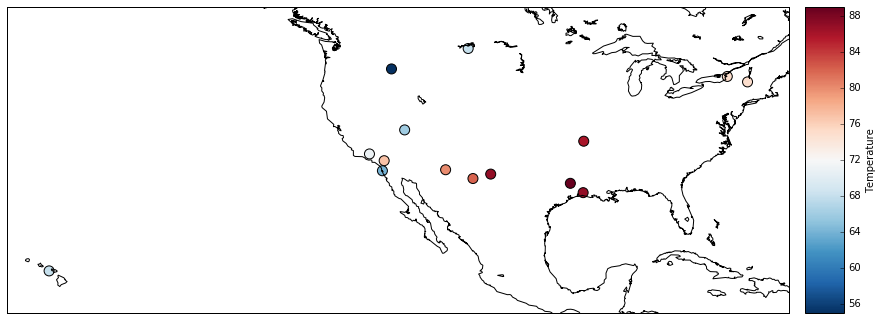

In [17]:
from mpl_toolkits.basemap import Basemap

figure(figsize=(15,20))
m = Basemap(llcrnrlat=df.lat.min()-5, llcrnrlon=df.lon.min()-5,
            urcrnrlat=df.lat.max()+5, urcrnrlon=df.lon.max()+5,
            resolution='l')

m.drawmapboundary()
m.drawcoastlines()
#m.shadedrelief()
xs, ys = m(df.lon, df.lat)

m.scatter(df.lon, df.lat, c=df.temp,
          marker='o', s=100, cmap=cm.RdBu_r, latlon=True)
m.colorbar(label='Temperature')

Just as a little 'show off' at the end of this comparison, I wanted to show how you can nice interactive maps in Python. I haven't gone into any of the advanced features of the `folium` library here - but even just these few lines of code allow you to interactively move around and see where the points are located: and it is fairly easy to add colours, popups and so on.

In [18]:
import folium

map_osm = folium.Map(location=[32,-104], zoom_start=3)
for i, row in df.iterrows():
    folium.Marker([row['lat'], row['lon']]).add_to(map_osm)
map_osm

## Summary

So, what has this shown?

Well, I don't want to get in to a full IDL vs Python war...but I will try and make a few summary statements:
* Sometimes tasks can be achieved in fewer lines of code in IDL, sometimes in Python - but overall, the number of lines of code doesn't really matter: it's far more important to have clear, easily understandable code.
* The majority of the tasks are accomplished in a very similar way in IDL and Python - and with a bit of time most experienced programmers could work out what code in either language is doing.
* A number of operations can be achieved in a simpler way using Python - for example, reading files (particularly CSV files) and displaying plots - as they don't require the extra boilerplate code that IDL requires (to do things like get the screen size, open a display window, create an empty array to read data into etc).
* Most IDL plotting functions take arguments allowing you to set things like the x-axis label or title of the plot _in the same function that you use to plot the data_ - whereas Python requires the use of separate functions like `xlabel` and `title`.
* I tend to find that Python has more sensible names for functions (things like `arange` rather than `findgen` and `imshow` rather than `tv`) - but that is probably down to personal taste.
* In my opinion, Python's plots look better by default than IDLs plots - and if you don't like the standard matplotlib style then they can be changed relatively easily. I've always struggled to get IDL plots looking really nice - but that may just be my lack of expertise.
* IDL has a huge amount of functionality 'baked-in' to the language by default, whereas Python provides lots of functionality through external libraries. Many of the actual functions are almost exactly equivalent - however there a number of disadvantages of the library-based approach, including issues with installing and updating libraries, lack of support for some libraries, trying to choose the best library to use, and the extra 'clutter' that comes from having to import libraries and use prefixes like `np.`.

Overall though, most things can be accomplished in either language. I prefer Python, and do nearly all of my programming in Python these days: but it's good to know that I can still drop back in to IDL if I need to - for example, when interfacing with ENVI.